# Overview
This notebook uses [xnatpy](https://bitbucket.org/bigr_erasmusmc/xnatpy) intead of the standard pyxnat to access and query the data inside

In [1]:
from __future__ import print_function, division, absolute_import
import pip
try:
    import xnat
except ImportError as ie:
    print('xnatpy not installed {}, lets try and install it'.format(ie))
    pip.main(['install','xnat'])
try:
    import pydicom
except ImportError as ie:
    print('pydicom >= 1.0 not installed {}, lets try and install it'.format(ie))
    pip.main(['install', 'git+https://github.com/pydicom/pydicom'])

xnatpy not installed No module named 'xnat', lets try and install it


In [2]:
from xnat import connect
session = connect('http://localhost/xnat', user="admin", password="admin")

In [3]:
all_proj = list(session.projects.keys())
first_proj = session.projects[all_proj[0]]

In [4]:
first_experiment = session.projects[0].experiments[0]
print(first_experiment.data)

{'ID': 'XNAT02_E00001', 'session_type': 'Thorax^1HEAD_NECK_PETCT', 'dcmAccessionNumber': '1017649297897545', 'project': 'lowdose', 'scanner/model': 'Emotion Duo', 'dcmPatientId': 'QIN-HEADNECK-01-0003', 'UID': '1.3.6.1.4.1.14519.5.2.1.2744.7002.174374398186717617822648546852', 'dcmPatientName': 'QIN-HEADNECK-01-0003', 'prearchivePath': '/data/xnat/prearchive/lowdose/20171219_174028182/QIN_HEADNECK_01_0003', 'label': 'QIN-HEADNECK-01-0003', 'date': '1986-09-07', 'subject_ID': 'XNAT02_S00001', 'id': 'XNAT02_E00001', 'time': '11:01:13', 'scanner/manufacturer': 'SIEMENS', 'modality': 'CT'}


# Download
Here download gives us the entire series so we have to run the script and then export files from the zip (or we can extract the entire zip if that is easier)

In [5]:
first_experiment.download('scans.zip')

  4.5 MiB |#                                |  60.4 MiB/s Elapsed Time: 0:00:00


In [6]:
from zipfile import ZipFile
with ZipFile('scans.zip', 'r') as f_scans:
    n_path = f_scans.extract(f_scans.filelist[2], '.')

## Parsing DICOM
We can now use pydicom to parse the dicom file and look at the header

In [7]:
from pydicom import read_file
in_image = read_file(n_path)
in_image

(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL', 'CT_SOM5 SPI']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.2744.7002.571023576785218434919437030570
(0008, 0020) Study Date                          DA: '19860907'
(0008, 0021) Series Date                         DA: '19860907'
(0008, 0022) Acquisition Date                    DA: '19860907'
(0008, 0023) Content Date                        DA: '19860907'
(0008, 0030) Study Time                          TM: '110113.872000'
(0008, 0031) Series Time                         TM: '110158.346000'
(0008, 0032) Acquisition Time                    TM: '110219.846972'
(0008, 0033) Content Time                        TM: '110219.846972'
(0008, 0050) Accession Number                    SH: '1017649297897545'
(0008, 0060) Modality                    

# Show the image

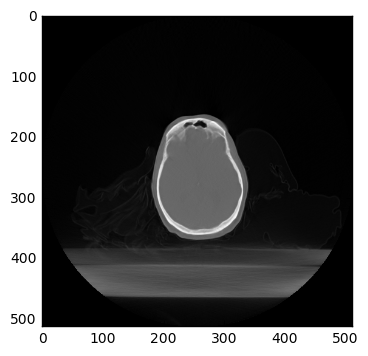

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(in_image.pixel_array, cmap = 'gray')